<a href="https://colab.research.google.com/github/zhz03/209_project_Blimp_modelling/blob/main/Drag%26moments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful formula
$F_{D}=\frac{1}{2} \rho v^{2} C_{D} A$

$C_D,\ \rho $ can be tested once the real model out

# Input and Output
Drag force

  Input:
  1. $v$
  2. $\rho$ ,  $C_d$... 
  3. volume V
  4. Angle of attack $\alpha$
  5. Angle of sideslip $\beta$

Output
  1. Drag force:  $Fd_x,\ Fd_y,\ Fd_z$
-----------------------------
Process simulation

  Input:
  1. $F_x,\ F_y,\ F_z$
  2. $\rho$ ,  $C_d$
  3. mass: m

Output
  1. Ultimate velocity
  2. plt of process

In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Assume Da 4m , Db 2m, Dc 2m   V^(2/3) = 4.125
Da = 4
Db = 2
Dc = 2
# Shape hull + Gondola
cdh0 = 0.025
cdg0 = 0.001
cdch = 1.0
cdcg = 1.0
Ref_Ac = 4.125
Ref_Ag = 0.1 
rho = 1.2

l_gz = 1

In [11]:
math.sin(math.pi/2)
abs(1)

1

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
def calculate_drag(v,alpha,beta):
  # CX1 in paper
  cdx = -1*(cdh0*Ref_Ac + cdg0*Ref_Ag)
  fd_x =0.5*rho*v**2*(cdx*math.cos(alpha)*math.cos(alpha)*math.cos(beta)*math.cos(beta))
  # CY3 in paper
  cdy = -1*(cdch*1.31*Ref_Ac + cdcg*Ref_Ag)
  fd_y =0.5*rho*v**2*(cdy*math.sin(beta)*math.sin(abs(beta)))
  # CZ3 in paper
  cdz = -1*(cdch*1.31*Ref_Ac)
  fd_z =0.5*rho*v**2*(cdz*math.sin(alpha)*math.sin(abs(alpha)))

  return fd_x,fd_y,fd_z

def calculate_moment(v,alpha,beta):
  # CL2 in paper
  cdl = -1*(cdcg*Ref_Ag*l_gz)
  L =0.5*rho*v**2*(cdl*math.sin(beta)*math.sin(abs(beta)))
  # CM3 in paper
  cdm = -1*(cdch*0.53*Ref_Ac*Da)
  M =0.5*rho*v**2*(cdm*math.sin(alpha)*math.sin(abs(alpha)))
  # CN3 in paper
  cdn = -1*cdm
  N =0.5*rho*v**2*(cdn*math.sin(beta)*math.sin(abs(beta)))

  return L,M,N



In [20]:
alpha = math.pi/10
beta = math.pi/20
v = 10
calculate_drag(v,alpha,beta)

(-5.464980883802252, -8.081180953216455, -30.96073249939133)

In [21]:
calculate_moment(v,alpha,beta)

(-0.1468304511145393, -50.104391525732545, 12.84032294996646)

# test: calculation of drag force

Text(0, 0.5, 'force(N)')

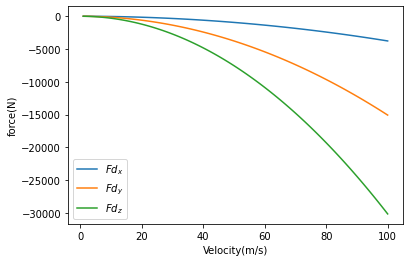

In [ ]:
import matplotlib.pyplot as plt
# test func: calculate_drag()  :
dx = 8
dy = 2
dz = 1
fdxs = []
fdys = []
fdzs = []
vs = range(1,101)
for v in range(1,101):
  fd_x,fd_y,fd_z = calculate_drag(v,v,v,dx,dy,dz)
  fdxs.append(fd_x)
  fdys.append(fd_y)
  fdzs.append(fd_z)

plt.plot(vs,fdxs,label='$Fd_x$')
plt.plot(vs,fdys,label='$Fd_y$')
plt.plot(vs,fdzs,label='$Fd_z$')
plt.legend()
plt.xlabel("Velocity(m/s)")
plt.ylabel("force(N)")




# test: simluation with outer force

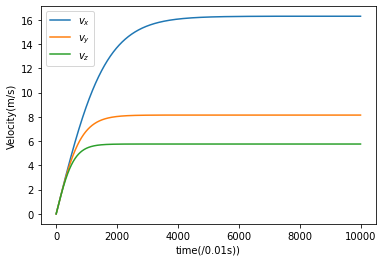

In [ ]:
ultimate_velocity(100,100,100,8,2,1,100)

# Motion Simulation
try to learn from
https://www.khanacademy.org/computer-programming/modeling-air-resistance/966875281